<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!python --version

Python 3.8.19


# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Mon Apr 18 22:14:23 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [5]:
# Import torch
import torch
from torch import nn
from torchvision import transforms, datasets
from torch.utils.data import DataLoader


import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.2.0


'cpu'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [6]:
pwd

'D:\\deep_leaning_with_pytorch\\Exercise'

In [7]:
# 1. Get data
import requests
import zipfile
from pathlib import Path

data_path = Path("Data")
image_path = data_path / "pizza_steak_sushi"

if image_path.is_dir():
    print("images already exist. No need for downloading!")
else:
    print('Downloading...')
    image_path.mkdir(parents=True, exist_ok=True)

    with open(data_path / "pizza_steak_sushi.zip", mode='wb') as zip_file:
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        if request.stats == 200:
            print(f"Success: {request.status}")
            zip_file.write(request.content)
    with zipfile.ZipFile(data_path / "pizza_steak_sushi.zip") as zip_ref:
        zip_ref.extractall(image_path)

# function to get data from the server online
def get_data(data_dir="data", file_name='downloaded_file', download_url=None):
    """
    data_dir: where data should be stored
    file_name: name of the downloaded file
    download_url: from where file should be downloaded
    """
    data_path = Path("Data")
    images_path = data_path / data_dir

    if images_path.is_dir():
        print("images already exist. No need for downloading!")
    else:
        print('Downloading...')
        images_path.mkdir(parents=True, exist_ok=True)

        with open(data_path / file_name, mode='wb') as zip_file:
            request = requests.get(download_url)
            if request.stats == 200:
                print(f"Success: {request.status}")
                zip_file.write(request.content)
    
        with zipfile.ZipFile(data_path / file_name) as zip_ref:
            zip_ref.extractall(images_path)

get_data(data_dir='sushi_steak_pizza',
        file_name='sushi_steak_pizza.zip',
        download_url="https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")

images already exist. No need for downloading!
images already exist. No need for downloading!


In [8]:
# Get data from a specific directory
path_to_data_zip = Path('../pytorch-deep-learning-main/data/pizza_steak_sushi_20_percent.zip')
data_path = Path('data')
images_path = data_path / 'pizza_steak_sushi'
if images_path.is_dir():
    print('Images already exists')
else:
    images_path.mkdir(parents=True, exist_ok=True)
    with zipfile.ZipFile(path_to_data_zip) as zip_ref:
        zip_ref.extractall(images_path)

Images already exists


In [9]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(data_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

walk_through_dir(data_path)
image_path = data_path

There are 2 directories and 1 images in 'data'.
There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 58 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 154 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 146 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 150 images in 'data\pizza_steak_sushi\train\sushi'.
There are 0 directories and 0 images in 'data\sushi_steak_pizza'.


In [30]:
# Setup train and testing paths
train_data_path = images_path / 'train'
test_data_path = images_path / 'test'

train_data_path, test_data_path

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

Random image path: data\pizza_steak_sushi\train\steak\2628106.jpg
Image class: steak
Image height: 512
Image width: 512


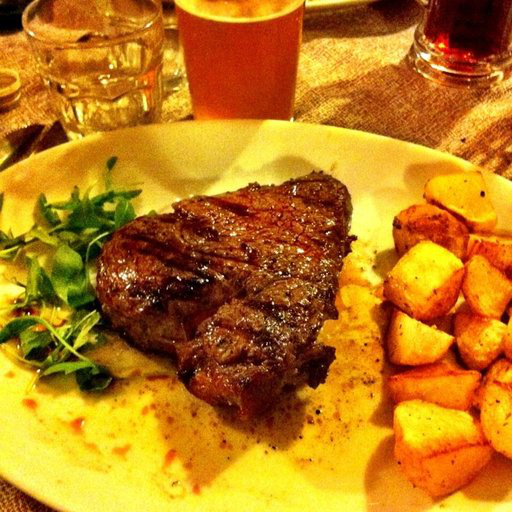

In [11]:
# Visualize an image
from PIL import Image
import random

images_path_list = list(train_data_path.glob(pattern='*/*.jpg'))
images_path_list[0]
random_image_path = random.choice(images_path_list)
image_class = random_image_path.parent.stem

image = Image.open(random_image_path)
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {image.height}") 
print(f"Image width: {image.width}")
image

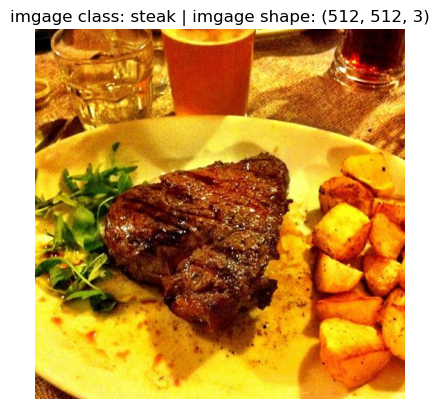

In [12]:
# Do the image visualization with matplotlib
# import matplotlib.pyplot as plt
# %conda install matplotlib

img = plt.imread(random_image_path)
plt.imshow(img)
plt.title(f'imgage class: {image_class} | imgage shape: {img.shape}')
plt.axis(False)
plt.show()

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [13]:
# 3.1 Transforming data with torchvision.transforms
transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

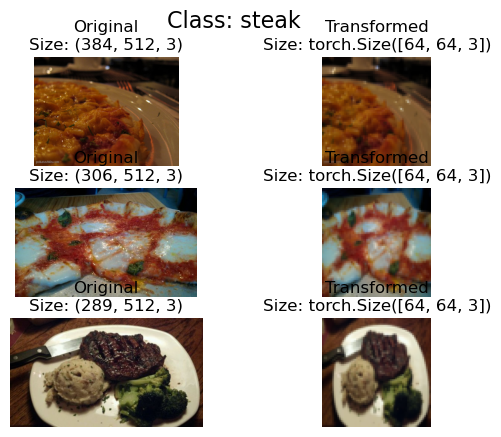

In [14]:
# Write a function to plot transformed images
def plot_transformed_images(images_path_list, transform, n=3, seed=42):
    random_images_path = random.sample(images_path_list, k=n)
    fig, ax = plt.subplots(nrows=3, ncols=2)
    i = 0
    for path in random_images_path:
        image = plt.imread(path)
        ax[i][0].imshow(image)
        ax[i][0].set_title(f'Original\nSize: {image.shape}')
        ax[i][0].axis('off')

        image = Image.open(path)
        image = transform(img=image).permute(1, 2, 0)  # [3, 64, 64] => [64, 64, 3]
        ax[i][1].imshow(image)
        ax[i][1].set_title(f'Transformed\nSize: {image.shape}')
        ax[i][1].axis('off')
        
        plt.suptitle(f'Class: {path.parent.stem}', fontsize=16)
        i += 1
plot_transformed_images(images_path_list=images_path_list,
                        transform=transform)

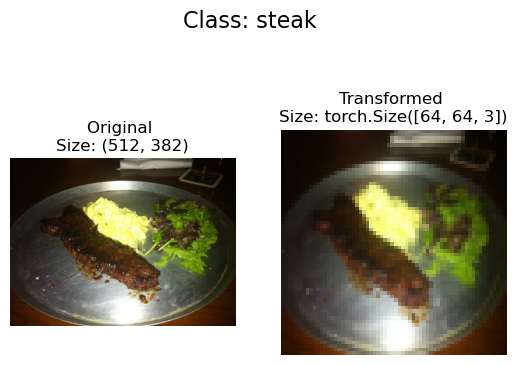

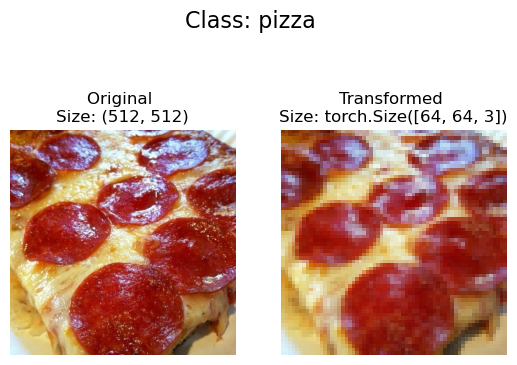

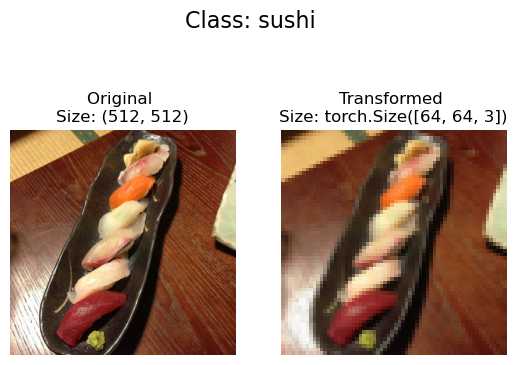

In [16]:
def plot_transformed_images(images_path_list, transform, n=3, seed=42):
    random_images_path = random.sample(images_path_list, k=n)
    for image_path in random_images_path:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f) 
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            # Transform and plot image
            # Note: permute() will change shape of image to suit matplotlib 
            # (PyTorch default is [C, H, W] but Matplotlib is [H, W, C])
            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image) 
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.stem}", fontsize=16)
plot_transformed_images(images_path_list=images_path_list,
                        transform=transform)

### Load image data using `ImageFolder`

In [33]:
# Use ImageFolder to create dataset(s)
train_data = datasets.ImageFolder(train_data_path, transform=transform, target_transform=None)
test_data = datasets.ImageFolder(test_data_path, transform=transform, target_transform=None)

train_data, test_data

(Dataset ImageFolder
     Number of datapoints: 450
     Root location: data\pizza_steak_sushi\train
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ),
 Dataset ImageFolder
     Number of datapoints: 150
     Root location: data\pizza_steak_sushi\test
     StandardTransform
 Transform: Compose(
                Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=warn)
                RandomHorizontalFlip(p=0.5)
                ToTensor()
            ))

In [34]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [35]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [36]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(450, 150)

In [99]:
# Turn train and test Datasets into DataLoaders
train_data_loader = DataLoader(dataset=train_data, batch_size=34, shuffle=True, drop_last=True)
test_data_loader = DataLoader(dataset=test_data, batch_size=34, shuffle=False, drop_last=True
                             )

train_data_loader, test_data_loader

(<torch.utils.data.dataloader.DataLoader at 0x188a1ff9a90>,
 <torch.utils.data.dataloader.DataLoader at 0x1889cc6ffa0>)

In [100]:
# How many batches of images are in our data loaders?
train_data_loader.batch_size, len(train_data_loader), len(test_data_loader)

(34, 13, 4)

In [101]:
for X, y in train_data_loader:
    print(X.shape, y.shape)

torch.Size([34, 3, 64, 64]) torch.Size([34])
torch.Size([34, 3, 64, 64]) torch.Size([34])
torch.Size([34, 3, 64, 64]) torch.Size([34])
torch.Size([34, 3, 64, 64]) torch.Size([34])
torch.Size([34, 3, 64, 64]) torch.Size([34])
torch.Size([34, 3, 64, 64]) torch.Size([34])
torch.Size([34, 3, 64, 64]) torch.Size([34])
torch.Size([34, 3, 64, 64]) torch.Size([34])
torch.Size([34, 3, 64, 64]) torch.Size([34])
torch.Size([34, 3, 64, 64]) torch.Size([34])
torch.Size([34, 3, 64, 64]) torch.Size([34])
torch.Size([34, 3, 64, 64]) torch.Size([34])
torch.Size([34, 3, 64, 64]) torch.Size([34])


## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [88]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=12, kernel_size=(2, 2), stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=12, out_channels=64, kernel_size=(2, 2), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=(2, 2))
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=(2, 2), stride=1, padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=(2, 2), stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=(2, 2))
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(256*17*17, 3)            
        )

    def forward(self, x:torch.Tensor):
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
model = Net()
model

Net(
  (conv_block_1): Sequential(
    (0): Conv2d(3, 12, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(12, 64, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(128, 256, kernel_size=(2, 2), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=(2, 2), padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=73984, out_features=3, bias=True)
  )
)

In [89]:
from torchinfo import summary
summary(model)

Layer (type:depth-idx)                   Param #
Net                                      --
├─Sequential: 1-1                        --
│    └─Conv2d: 2-1                       156
│    └─ReLU: 2-2                         --
│    └─Conv2d: 2-3                       3,136
│    └─ReLU: 2-4                         --
│    └─MaxPool2d: 2-5                    --
├─Sequential: 1-2                        --
│    └─Conv2d: 2-6                       32,896
│    └─ReLU: 2-7                         --
│    └─Conv2d: 2-8                       131,328
│    └─ReLU: 2-9                         --
│    └─MaxPool2d: 2-10                   --
├─Sequential: 1-3                        --
│    └─Flatten: 2-11                     --
│    └─Linear: 2-12                      221,955
Total params: 389,471
Trainable params: 389,471
Non-trainable params: 0

In [53]:
batch, labels = next(iter((train_data_loader)))

In [66]:
an_image, a_label = batch[0].unsqueeze(dim=0), labels[0]
model.eval()
with torch.inference_mode():
    pred = model(an_image)

print(f'Output Logits: {pred}')
print(f'Prediction probabilities: {torch.softmax(pred, dim=1)}')
print(f'Predicted label: {torch.argmax(torch.softmax(pred, dim=1), dim=1)}')
print(f'Actual label: {a_label}')

torch.Size([1, 64, 33, 33])
torch.Size([1, 256, 17, 17])
torch.Size([1, 3])
Output Logits: tensor([[ 0.0348, -0.0240,  0.0201]])
Prediction probabilities: tensor([[0.3415, 0.3220, 0.3365]])
Predicted label: tensor([0])
Actual label: 1


## 4. Create training and testing functions for `model_0`.

In [80]:
# !pip install torchinfo
!pip install tqdm
!pip freeze

  Using cached tqdm-4.66.2-py3-none-any.whl.metadata (57 kB)
Using cached tqdm-4.66.2-py3-none-any.whl (78 kB)
anyio @ file:///C:/b/abs_847uobe7ea/croot/anyio_1706220224037/work
argon2-cffi @ file:///opt/conda/conda-bld/argon2-cffi_1645000214183/work
argon2-cffi-bindings @ file:///C:/ci/argon2-cffi-bindings_1644569878360/work
asttokens @ file:///home/conda/feedstock_root/build_artifacts/asttokens_1698341106958/work
async-lru @ file:///C:/b/abs_e0hjkvwwb5/croot/async-lru_1699554572212/work
attrs @ file:///C:/b/abs_35n0jusce8/croot/attrs_1695717880170/work
Babel @ file:///C:/b/abs_a2shv_3tqi/croot/babel_1671782804377/work
backcall @ file:///home/conda/feedstock_root/build_artifacts/backcall_1592338393461/work
beautifulsoup4 @ file:///C:/b/abs_0agyz1wsr4/croot/beautifulsoup4-split_1681493048687/work
bleach @ file:///opt/conda/conda-bld/bleach_1641577558959/work
Brotli @ file:///C:/Windows/Temp/abs_63l7912z0e/croots/recipe/brotli-split_1659616056886/work
certifi @ file:///C:/b/abs_35d7n66o

In [96]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_accuracy = 0, 0

  # Loop through data loader and data batches
  for X, y in dataloader:
    # Send data to target device
    X = batch.to(device)
    # 1. Forward pass
    y_preds = model(X)
    # 2. Calculate and accumulate loss
    loss = loss_fn(y_preds, y)
    train_loss += loss.item()
    # 3. Optimizer zero grad 
    optimizer.zero_grad()
    
    # 4. Loss backward 
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    y_pred_classes = torch.argmax(torch.softmax(y_preds, dim=1), dim=1)
    train_accuracy += (y_pred_classes == y).sum().item()/len(y_preds)
  # Adjust metrics to get average loss and average accuracy per batch
  train_accuracy = train_accuracy / len(dataloader)
  train_loss = train_loss / len(dataloader)
  return train_loss, train_accuracy

In [73]:
x = torch.tensor([1, 0, 1, 1, 0, 0, 1])
y = torch.tensor([1, 0, 1, 0, 1, 0, 1])

(x == y).sum().item()/len(x)

0.7142857142857143

In [106]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  
  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
    # Loop through DataLoader batches
    for X, y in dataloader:    
      # Send data to target device
      X, y = X.to(device), y.to(device)

      # 1. Forward pass
      y_preds = model(X)
      
      # 2. Calculuate and accumulate loss
      loss = loss_fn(y_preds, y)
      test_loss += loss.item()
      # Calculate and accumulate accuracy
      pred_classes = torch.argmax(torch.softmax(y_preds, dim=1), dim=1)
      test_acc += (y == pred_classes).sum().item()/len(pred_classes)
  # Adjust metrics to get average loss and accuracy per batch
  test_acc /= len(dataloader)
  test_loss /= len(dataloader)
  return test_loss, test_acc

In [104]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
  
  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model, 
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model, 
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)
    
    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer. 

In [107]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), 
                             lr=0.00=1)

train(model=model, train_dataloader=train_data_loader, test_dataloader=test_data_loader, optimizer=optimizer, loss_fn=loss_fn, epochs=5)

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0994 | train_acc: 0.3258 | test_loss: 1.0989 | test_acc: 0.3382
Epoch: 2 | train_loss: 1.0988 | train_acc: 0.3145 | test_loss: 1.0983 | test_acc: 0.3971
Epoch: 3 | train_loss: 1.0988 | train_acc: 0.3258 | test_loss: 1.0994 | test_acc: 0.3382
Epoch: 4 | train_loss: 1.0987 | train_acc: 0.3416 | test_loss: 1.0985 | test_acc: 0.3382
Epoch: 5 | train_loss: 1.0987 | train_acc: 0.3416 | test_loss: 1.0986 | test_acc: 0.3382


{'train_loss': [1.09936850804549,
  1.0988168624731212,
  1.0987809071174035,
  1.0986878138322096,
  1.0987026141240046],
 'train_acc': [0.32579185520361986,
  0.31447963800904977,
  0.32579185520362,
  0.3416289592760181,
  0.3416289592760181],
 'test_loss': [1.0988503396511078,
  1.098320633172989,
  1.099404901266098,
  1.0985313057899475,
  1.0986480414867401],
 'test_acc': [0.338235294117647,
  0.39705882352941174,
  0.3382352941176471,
  0.3382352941176471,
  0.3382352941176471]}

In [108]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), 
                             lr=0.001)
train(model=model, train_dataloader=train_data_loader, test_dataloader=test_data_loader, optimizer=optimizer, loss_fn=loss_fn, epochs=10)

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0988 | train_acc: 0.3145 | test_loss: 1.0980 | test_acc: 0.3382
Epoch: 2 | train_loss: 1.0987 | train_acc: 0.3394 | test_loss: 1.0984 | test_acc: 0.3382
Epoch: 3 | train_loss: 1.0986 | train_acc: 0.3439 | test_loss: 1.0990 | test_acc: 0.3382
Epoch: 4 | train_loss: 1.0986 | train_acc: 0.3416 | test_loss: 1.0985 | test_acc: 0.3382
Epoch: 5 | train_loss: 1.0987 | train_acc: 0.3416 | test_loss: 1.0986 | test_acc: 0.3382
Epoch: 6 | train_loss: 1.0985 | train_acc: 0.3439 | test_loss: 1.0988 | test_acc: 0.3382
Epoch: 7 | train_loss: 1.0986 | train_acc: 0.3416 | test_loss: 1.0989 | test_acc: 0.3382
Epoch: 8 | train_loss: 1.0985 | train_acc: 0.3462 | test_loss: 1.0994 | test_acc: 0.3382
Epoch: 9 | train_loss: 1.0984 | train_acc: 0.3462 | test_loss: 1.0996 | test_acc: 0.3382
Epoch: 10 | train_loss: 1.0985 | train_acc: 0.3439 | test_loss: 1.0997 | test_acc: 0.3382


{'train_loss': [1.098783355492812,
  1.0986609550622792,
  1.0986160865196815,
  1.0986224596316998,
  1.098651069861192,
  1.0985333094230065,
  1.0985991954803467,
  1.0984752911787767,
  1.0984087265454805,
  1.0984895687836866],
 'train_acc': [0.31447963800904977,
  0.33936651583710403,
  0.3438914027149321,
  0.3416289592760181,
  0.3416289592760181,
  0.34389140271493207,
  0.34162895927601805,
  0.34615384615384615,
  0.34615384615384615,
  0.3438914027149321],
 'test_loss': [1.098026603460312,
  1.0983864963054657,
  1.0989686250686646,
  1.098499208688736,
  1.0986080169677734,
  1.098800003528595,
  1.0988657772541046,
  1.09936985373497,
  1.099580854177475,
  1.099733293056488],
 'test_acc': [0.3382352941176471,
  0.3382352941176471,
  0.3382352941176471,
  0.3382352941176471,
  0.3382352941176471,
  0.3382352941176471,
  0.3382352941176471,
  0.3382352941176471,
  0.3382352941176471,
  0.3382352941176471]}

In [111]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), 
                             lr=0.01)
train(model=model, train_dataloader=train_data_loader, test_dataloader=test_data_loader, optimizer=optimizer, loss_fn=loss_fn, epochs=50)

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1403 | train_acc: 0.3258 | test_loss: 1.0968 | test_acc: 0.4265
Epoch: 2 | train_loss: 1.1025 | train_acc: 0.3009 | test_loss: 1.0988 | test_acc: 0.3382
Epoch: 3 | train_loss: 1.1012 | train_acc: 0.3122 | test_loss: 1.0899 | test_acc: 0.4265
Epoch: 4 | train_loss: 1.1014 | train_acc: 0.3145 | test_loss: 1.0998 | test_acc: 0.3382
Epoch: 5 | train_loss: 1.0990 | train_acc: 0.3416 | test_loss: 1.1003 | test_acc: 0.3382
Epoch: 6 | train_loss: 1.0985 | train_acc: 0.3439 | test_loss: 1.1006 | test_acc: 0.3382
Epoch: 7 | train_loss: 1.0986 | train_acc: 0.3416 | test_loss: 1.1002 | test_acc: 0.3382
Epoch: 8 | train_loss: 1.0985 | train_acc: 0.3462 | test_loss: 1.1016 | test_acc: 0.3382
Epoch: 9 | train_loss: 1.0984 | train_acc: 0.3462 | test_loss: 1.1014 | test_acc: 0.3382
Epoch: 10 | train_loss: 1.0986 | train_acc: 0.3439 | test_loss: 1.1014 | test_acc: 0.3382
Epoch: 11 | train_loss: 1.0987 | train_acc: 0.3439 | test_loss: 1.1018 | test_acc: 0.3382
Epoch: 12 | train_l

{'train_loss': [1.140324510060824,
  1.1024858401371882,
  1.101246402813838,
  1.1014102055476263,
  1.0989818481298594,
  1.0984576390339778,
  1.0985515667841985,
  1.0985457713787372,
  1.0983683604460497,
  1.098630510843717,
  1.0987060987032378,
  1.0987713978840754,
  1.0988019796518178,
  1.0985491000688994,
  1.098797504718487,
  1.0987539566480196,
  1.0988441522304828,
  1.0985868160541241,
  1.098425920193012,
  1.0987385603097768,
  1.0986996430617113,
  1.0989668002495399,
  1.0987765422234168,
  1.0986438622841468,
  1.0985472385699933,
  1.0988083711037269,
  1.0985579398962169,
  1.0986236058748686,
  1.0985295130656316,
  1.0989163380402784,
  1.0990326679669893,
  1.098677130845877,
  1.0985527221973126,
  1.099493145942688,
  1.0992017159095178,
  1.0985668622530425,
  1.0987242460250854,
  1.0989916599713838,
  1.09865953372075,
  1.098917374244103,
  1.0988102967922504,
  1.098360804411081,
  1.0993758990214422,
  1.0989711834834173,
  1.0988783102769117,
  1.098

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [ ]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)


It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [ ]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
image_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it... 
if image_path.is_dir():
    print(f"{image_path} directory exists.")
else:
    print(f"Did not find {image_path} directory, creating one...")
    image_path.mkdir(parents=True, exist_ok=True)
    
# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...") 
    zip_ref.extractall(image_path)

In [ ]:
# See how many images we have
walk_through_dir(image_path)

Excellent, we now have double the training and testing images... 

In [ ]:
# Create the train and test paths
train_data_20_percent_path = image_path / "train"
test_data_20_percent_path = image_path / "test"

train_data_20_percent_path, test_data_20_percent_path

In [ ]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),                                     
  transforms.ToTensor()
])

# Create datasets


# Create dataloaders


In [ ]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction. 
* Does the model you trained in exercise 7 get it right? 
* If not, what do you think you could do to improve it?